In [14]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from env import host, username, password

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import acquire
np.random.seed(4)

df = acquire.get_iris_data()



## Clustering with the Iris Dataset

### exercise 1:

Using this lesson as a guide, perform clustering on the iris dataset.

Choose features other than the ones used in the lesson.

In [2]:
X = df[['petal_width', 'sepal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)
df['cluster'] = kmeans.predict(X)

In [3]:
df=df.rename(columns={'species_name':'species'})

Visualize the results of your clustering.

[Text(0.5, 1.0, 'K-Means Clusters')]

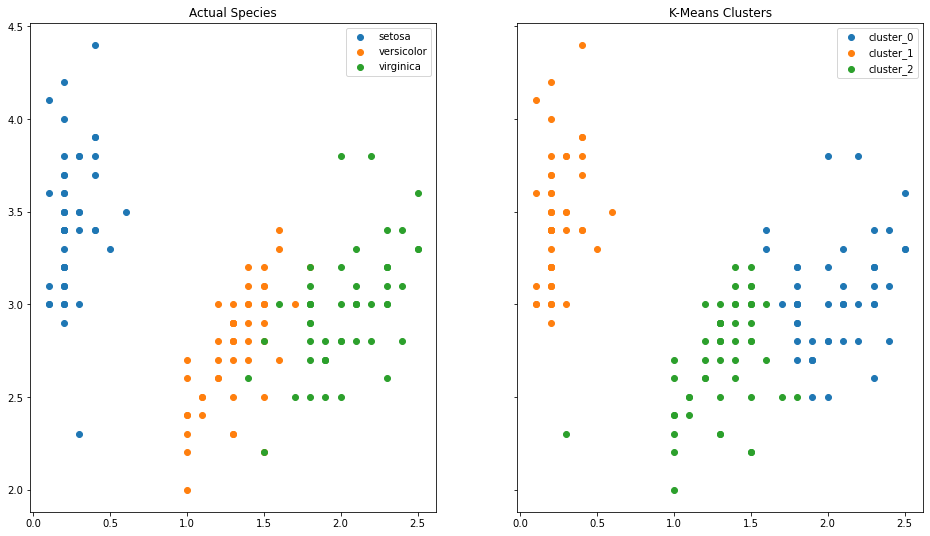

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_width, subset.sepal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].petal_width, df[df.cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

Use the elbow method to visually select a good value for k.

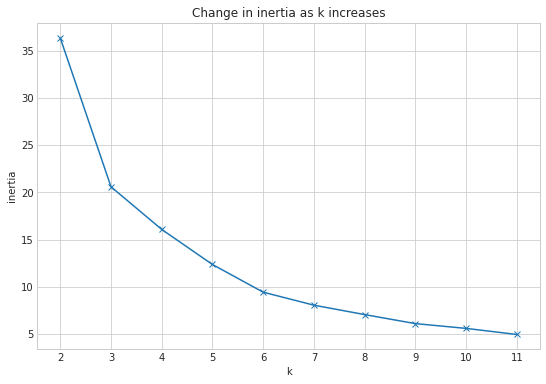

In [5]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


Repeat the clustering, this time with 3 different features.

In [6]:
X = df[['petal_width', 'sepal_width','petal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
df['three_feature_cluster'] = clusters

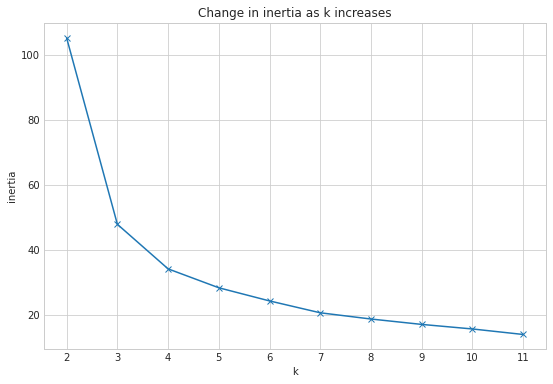

In [7]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

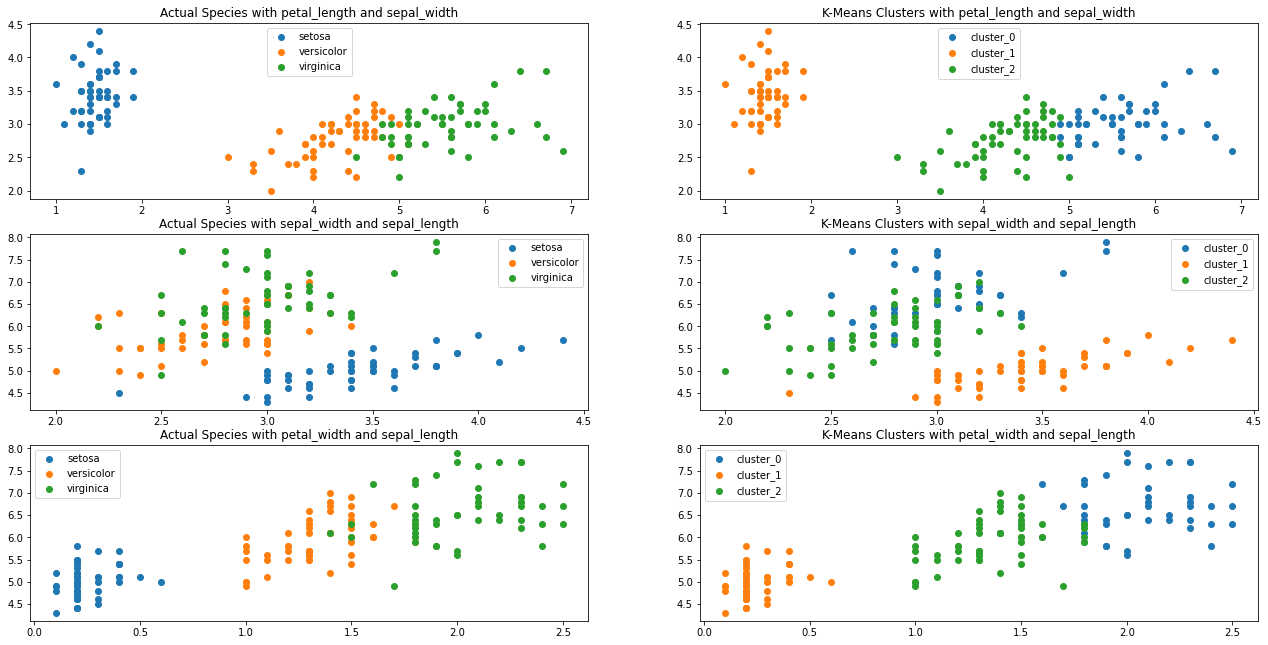

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in df.groupby('species'):
    axs[0,0].scatter(subset.petal_length, subset.sepal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with petal_length and sepal_width')
    
for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with petal_length and sepal_width")

for species, subset in df.groupby('species'):
    axs[1,0].scatter(subset.sepal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with sepal_width and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(df[df.three_feature_cluster == cluster_n].sepal_width, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with sepal_width and sepal_length")

for species, subset in df.groupby('species'):
    axs[2,0].scatter(subset.petal_width, subset.sepal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with petal_width and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(df[df.three_feature_cluster == cluster_n].petal_width, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with petal_width and sepal_length")

plt.show()

### exercise 2:
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [19]:
def get_db_url(host, username, password, database):
    return f'mysql+pymysql://{username}:{password}@{host}/{database}'

mall_query = '''
             SELECT *
             FROM customers
             '''
#Create the url to access the database
mall_database = 'mall_customers'

mall_url = get_db_url(host, username, password, mall_database)
mall_df = pd.read_sql(mall_query, mall_url)

mall_df.head()
dummies = pd.get_dummies(mall_df.gender, drop_first=True)
mall_df = pd.concat([mall_df.drop(columns='gender'),dummies], axis=1)


In [20]:
train, validate = train_test_split(mall_df, random_state=123)
train, test = train_test_split(train, random_state=123)

In [24]:
train.head()

,customer_id,age,annual_income,spending_score,Male
154,155,47,78,16,0
1,2,21,15,81,1
87,88,22,57,55,0
35,36,21,33,81,0
106,107,66,63,50,0


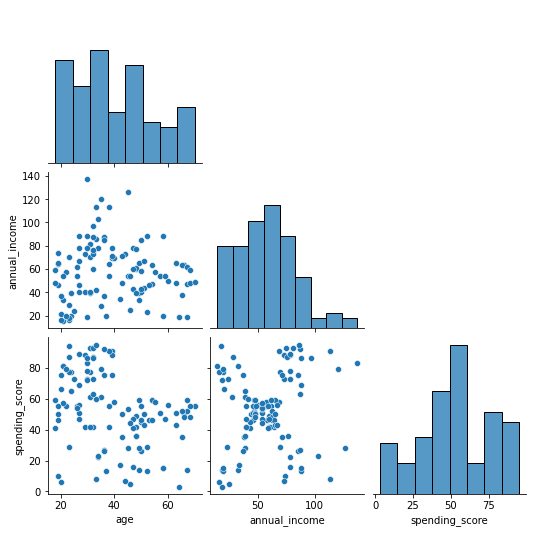

In [25]:
sns.pairplot(train.drop(columns=['Male','customer_id']), corner=True)

In [33]:
X = train[['age','annual_income']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)
train['cluster'] = kmeans.predict(X)

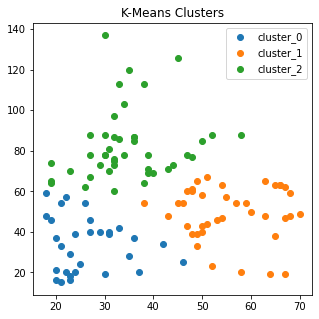

In [34]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].age, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

How does scaling impact the results of clustering?

In [37]:
mms = MinMaxScaler()

train[['age', 'annual_income']] = mms.fit_transform(train[['age','annual_income']])

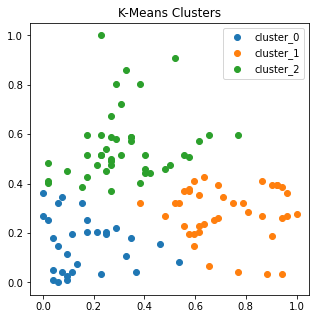

In [39]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].age, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.